#### k-means算法的局限性

+ 随机生成200个2维样本，分布在两个半圆形的曲线附近
+ 使用k-means算法将样本聚类为2个簇
+ 显示聚类的结果

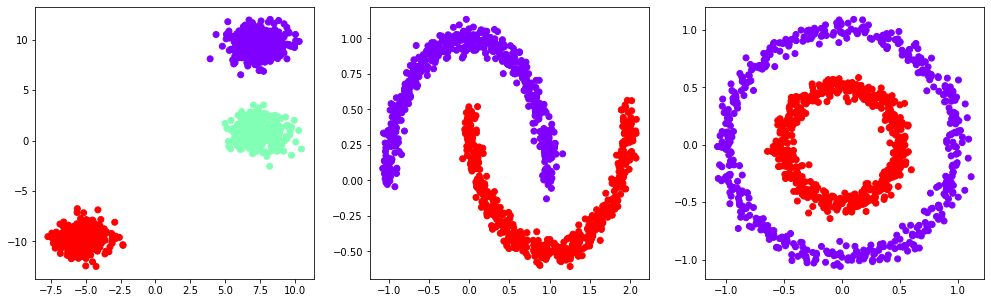

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_blobs, make_circles

X_blob, y_blob = make_blobs(n_samples=1000, random_state=8)
X_moon, y_moon = make_moons(n_samples=1000, noise=0.05, random_state=0)
X_circle, y_circle = make_circles(n_samples=1000, factor=.5,noise=.05)

fig, axes = plt.subplots(1, 3, figsize=(17, 5))
axes[0].scatter(X_blob[:,0], X_blob[:,1], c=y_blob, cmap='rainbow')
axes[1].scatter(X_moon[:,0], X_moon[:,1], c=y_moon, cmap='rainbow')
axes[2].scatter(X_circle[:,0], X_circle[:,1], c=y_circle, cmap='rainbow')

plt.show()

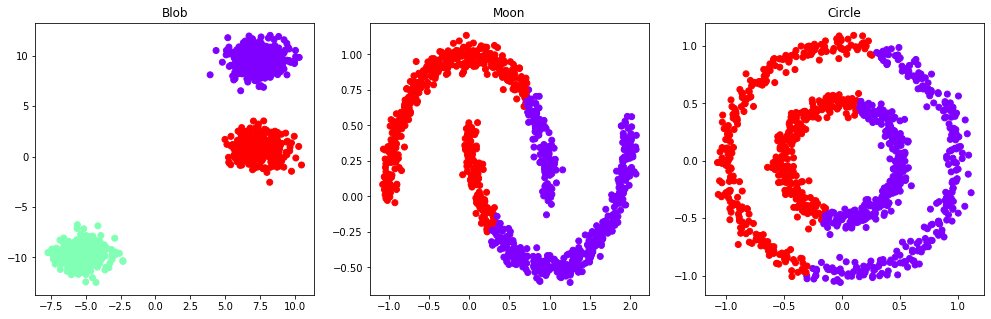

In [8]:
from sklearn.cluster import KMeans

fig, axes = plt.subplots(1, 3, figsize=(17, 5))

kmeans = KMeans(n_clusters=3)
y_predict = kmeans.fit_predict(X_blob)
axes[0].scatter(X_blob[:,0], X_blob[:,1], c=y_predict, cmap='rainbow')
axes[0].set_title("Blob")

kmeans = KMeans(n_clusters=2)
y_predict = kmeans.fit_predict(X_moon)
axes[1].scatter(X_moon[:,0], X_moon[:,1], c=y_predict, cmap='rainbow')
axes[1].set_title("Moon")

kmeans = KMeans(n_clusters=2)
y_predict = kmeans.fit_predict(X_circle)
axes[2].scatter(X_circle[:,0], X_circle[:,1], c=y_predict, cmap='rainbow')
axes[2].set_title("Circle")

plt.show()

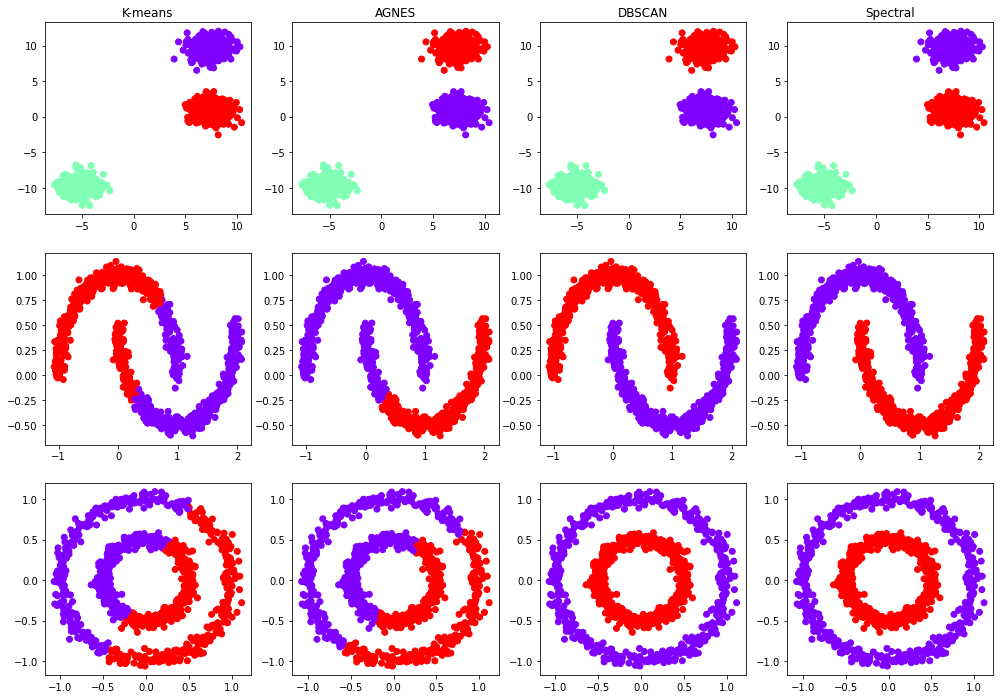

In [44]:
from sklearn.cluster import AgglomerativeClustering, DBSCAN, SpectralClustering

fig, axes = plt.subplots(3, 4, figsize=(17, 12))
algorithms = [KMeans(n_clusters=3),AgglomerativeClustering(n_clusters=3),DBSCAN(min_samples=5, eps=2),SpectralClustering(n_clusters=3)]
names = ["K-means","AGNES","DBSCAN","Spectral"]

for ax,algorithm,name in zip(axes[0],algorithms,names):
    y_predict = algorithm.fit_predict(X_blob)
    ax.scatter(X_blob[:,0], X_blob[:,1], c=y_predict, cmap='rainbow')
    ax.set_title(name)

algorithms = [KMeans(n_clusters=2),AgglomerativeClustering(n_clusters=2),DBSCAN(min_samples=6, eps=0.1),SpectralClustering(n_clusters=2,affinity="nearest_neighbors",n_neighbors=20)]
for ax,algorithm,name in zip(axes[1],algorithms,names):
    y_predict = algorithm.fit_predict(X_moon)
    ax.scatter(X_moon[:,0], X_moon[:,1], c=y_predict, cmap='rainbow')

algorithms = [KMeans(n_clusters=2),AgglomerativeClustering(n_clusters=2),DBSCAN(min_samples=3, eps=0.2),SpectralClustering(n_clusters=2,affinity="nearest_neighbors",n_neighbors=30)]
for ax,algorithm,name in zip(axes[2],algorithms,names):
    y_predict = algorithm.fit_predict(X_circle)
    ax.scatter(X_circle[:,0], X_circle[:,1], c=y_predict, cmap='rainbow')

plt.show()